# Часть первая
Привет всем любителям палеогеографии🌏 

Здесь мы построим кучу графиков, данные для которых были получены на сайте [NOAA](https://www.ncei.noaa.gov/access/paleo-search/). В этой части мы разбираем файл ледникового керна `EPICA DOME C`. Мы будем сторить график накопления тяжелых изотопов кислорода

Этот ~~хахатон~~ Хакатон выполнили Данилов Степан и Мухамеджанов Александр. 




Hello everyone🌏

Here we create many plots and, data had gotten from [NOAA](https://www.ncei.noaa.gov/access/paleo-search/). At this part we look at `EPICA DOME C`. We will create CO$_2$ plot.

In [34]:
#Import libraries
import pandas as pd
import plotly.express as px

In [2]:
data = pd.read_table('data/antarctica2015co2domec.txt', delimiter='\t', comment='#') # import data

In [3]:
fig = px.line(data, x='age_gas_calBP', y='co2_ppm', height=800) # create a plot with height 800 px
fig.update_xaxes(title_text = '<b>CO$_2$</b>')
fig.update_yaxes(title_text = '<b>Возраст</b>')
fig.update_layout(
            title={
                'text': "<b>Возраст изотопа кислорода</b>",
                'y': 0.97,
                'x': 0.5,
                'xanchor': 'center',
                'yanchor': 'top'})
fig.show()

## Часть вторая

А теперь погрузимся в события Дансгора-Эшгера. Это резкие колебания температуры, которые происходили из-за теплого течения в Атлантическом океане и ледникового щита Гренландии. Сейчас они невозможны тк нет ледникового щита, с которого могло бы надувать холодом. 😃

Давайте найдем эти колебания на графике

In [6]:
DO=pd.read_csv('DO.csv') #import csv file with data. Use DO = pd.read_excel('data/DO.xlsx') to try raw data
DO.head(5)

,Depth (m),del18O,Age (yrs BP),temperature
0,0.00,-35.04,-39.000,-31.85
1,0.55,-33.81,-38.065,-30.01
2,1.10,-36.18,-37.187,-33.55
3,1.65,-34.92,-36.118,-31.67
4,2.20,-35.62,-35.145,-32.72


In [102]:
DO.isna().sum() # find null values( it was useful, before we clear theese values from .xlsx)

Depth (m)       0
del18O          0
Age (yrs BP)    0
temperature     0
dtype: int64

In [103]:
DO[DO.duplicated()] # it also used to be useful before cleaning the raw data

,Depth (m),del18O,Age (yrs BP),temperature


In [7]:
fig = px.line(DO, x='del18O', y='Age (yrs BP)',range_y=[10000,50000], height=800) # create plot with values in range [10000,50000] and its' height is 800 px
fig.update_xaxes(title_text = '<b>Значение</b>')
fig.update_yaxes(title_text = '<b>Возраст</b>')
fig.update_layout(
            title={
                'text': "<b>Возраст изотопа кислорода</b>",
                'y': 0.97,
                'x': 0.5,
                'xanchor': 'center',
                'yanchor': 'top'})
fig.show()

In [8]:
DO['temperature']=round((DO['del18O']+13.7)/0.67,2) # find Temperature values from O$_18$
data.head(5)

,depth_m,age_gas_calBP,age_gas_calBP.1,co2_ppm,co2_1s_ppm,notes
0,102.83,137.0,350.11,280.4,1.8,Dome C (0-22 kyr BP) Monnin et al. (2001+2004...
1,106.89,268.0,486.69,274.9,0.7,Dome C (0-22 kyr BP) Monnin et al. (2001+2004...
2,107.20,279.0,501.20,277.9,0.7,Dome C (0-22 kyr BP) Monnin et al. (2001+2004...
3,110.25,395.0,539.65,279.1,1.3,Dome C (0-22 kyr BP) Monnin et al. (2001+2004...
4,110.50,404.0,539.89,281.9,1.1,Dome C (0-22 kyr BP) Monnin et al. (2001+2004...


In [9]:
fig=px.line(DO,x='Age (yrs BP)',y='temperature',range_x=[125000,150000]) # We have found Dansgaard-Oeshger event and now vizualize it 
fig.update_xaxes(title_text = '<b>Возраст</b>')
fig.update_yaxes(title_text = '<b>Температура</b>')
fig.update_layout(
            title={
                'text': "<b>Событие Dansgaard Oeschger (DO)</b>",
                'y': 0.97,
                'x': 0.5,
                'xanchor': 'center',
                'yanchor': 'top'})
fig.show()

Температура поднялась от **-36.03** до **-26.91**

Temperature skyrocket from **-36.03** to **-26.91**

Потребовалось 20 тысяч лет для похолодания. It took 20 thousant years to get as cold as it was

### Часть три
Температура и CO$_2$. Тут мы построим графики зависимости температуры и угликислого газа.  Вот что указано в файле про измерения

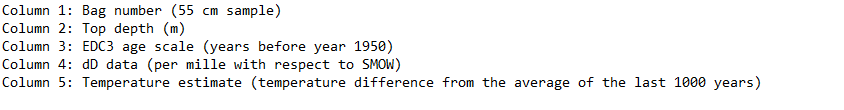

In [11]:
temp=pd.read_csv('temp.csv') #openning file
temp.head(5)

,Bag,ztop,Age,Deuterium,Temperature
0,13.0,45449.0,38.37379,-390.9,0.88
1,16.0,45870.0,64.41511,-394.1,0.35
2,17.0,45512.0,73.15077,-398.7,-0.42
3,18.0,13028.0,81.93244,-395.9,0.05
4,19.0,45544.0,90.75925,-395.9,0.05


In [104]:
temp.isna().sum()

Bag               0
ztop              0
Age               0
Deuterium         0
Temperature    4804
dtype: int64

In [105]:
temp=temp.dropna()

In [111]:
temp[temp.duplicated()]

,Bag,ztop,Age,Deuterium,Temperature


In [12]:
temp['Temperature'].describe()

count    946.000000
mean      -2.678129
std        3.433250
min      -10.430000
25%       -4.600000
50%       -1.040000
75%       -0.200000
max        0.990000
Name: Temperature, dtype: float64

У **температуры** имеются нереалистично большие значения. Чтобы их еще лучше увидеть, визуализируем зависимость **температуры** от **возраста**.

In [13]:
fig=px.scatter(temp,y='Temperature', x='Age') #create a scatter-plot for temperature
fig.update_xaxes(title_text = '<b>Возраст</b>')
fig.update_yaxes(title_text = '<b>Температура</b>')
fig.update_layout(
            title={
                'text': "<b>Зависимость температуры от возраста</b>",
                'y': 0.97,
                'x': 0.5,
                'xanchor': 'center',
                'yanchor': 'top'})
fig.show()

Все нереалистичные значения больше **10000**, отсечем их.

In [14]:
temp_norm=temp[temp['Temperature']<10000]

In [15]:
fig=px.scatter(temp_norm,y='Temperature', x='Age')
fig.update_xaxes(title_text = '<b>Возраст</b>')
fig.update_yaxes(title_text = '<b>Температура</b>')
fig.update_layout(
            title={
                'text': "<b>Зависимость температуры от возраста</b>",
                'y': 0.97,
                'x': 0.5,
                'xanchor': 'center',
                'yanchor': 'top'})
fig.show()

In [16]:
fig=px.scatter(temp_norm,x='Deuterium',y='Temperature')
fig.update_xaxes(title_text = '<b>CO2</b>')
fig.update_yaxes(title_text = '<b>Температура</b>')
fig.update_layout(
            title={
                'text': "Зависимость температуры от содержания CO2 в атмосфере",
                'y': 0.97,
                'x': 0.5,
                'xanchor': 'center',
                'yanchor': 'top'})
fig.show()

#### Часть четвёртая
Эльбрус

In [18]:
summer=pd.read_csv('summer.csv')
summer.head(5)

,Year,Nh4[ppb],No3[ppb],So4[ppb]
0,2009,207.721107,580.166682,723.913661
1,2008,180.920770,503.948766,730.801810
2,2007,174.581482,420.185156,493.577113
3,2006,264.445689,514.252545,559.764473
4,2005,146.390588,403.104027,527.255300


In [20]:
summer.isna().sum()

Year        0
Nh4[ppb]    0
No3[ppb]    0
So4[ppb]    0
dtype: int64

In [21]:
summer=summer.dropna()

In [22]:
summer[summer.duplicated()]

,Year,Nh4[ppb],No3[ppb],So4[ppb]


In [23]:
elbrus=pd.read_csv('elbrus.csv')
elbrus.head(5)

,Depth. m,Depth Bottom. m,Depth top. mwe,Depth bot. mwe,Nh4[ppb],Ca[ppb],No3[ppb],So4[ppb]
0,0.000,0.312,0.000,0.103,371.018,648.402,1217.063,1017.387
1,0.312,0.624,0.103,0.205,63.717,113.309,330.335,209.172
2,0.624,0.936,0.205,0.308,199.320,807.977,512.069,667.906
3,0.936,1.248,0.308,0.411,191.292,1068.217,538.771,773.537
4,1.248,1.559,0.411,0.514,172.825,350.990,403.664,473.625


In [24]:
elbrus.isna().sum()

Depth. m           0
Depth Bottom. m    0
Depth top. mwe     0
Depth bot. mwe     0
Nh4[ppb]           0
Ca[ppb]            0
No3[ppb]           0
So4[ppb]           0
dtype: int64

In [25]:
elbrus=elbrus.dropna()

In [26]:
elbrus[elbrus.duplicated()]

,Depth. m,Depth Bottom. m,Depth top. mwe,Depth bot. mwe,Nh4[ppb],Ca[ppb],No3[ppb],So4[ppb]


In [27]:
import plotly.express as px

fig = px.scatter(elbrus, x='Nh4[ppb]', y='Depth. m', trendline='ols',
                 color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.update_xaxes(title_text='<b>NH4, ppb</b>')
fig.update_yaxes(title_text='<b>Глубина, м</b>')
fig.update_layout(
    title={
        'text': "<b>Зависимость глубины от содержания NH4</b>",
        'y': 0.97,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

In [28]:
fig=px.line(summer,x='Year',y='Nh4[ppb]')
fig.update_xaxes(title_text='<b>Год</b>')
fig.update_yaxes(title_text='<b>NH4, ppb</b>')
fig.update_layout(
    title={
        'text': "<b>Изменение содержания NH4 с течением времени</b>",
        'y': 0.97,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [29]:
h_NH4=round(max(summer['Nh4[ppb]'])/min(summer['Nh4[ppb]']),2)
print(f'Превышение NH4 в {h_NH4} раз(a)')

Превышение NH4 в 13.06 раз(a)


In [30]:
fig=px.line(summer,x='Year',y='No3[ppb]')
fig.update_xaxes(title_text='<b>Год</b>')
fig.update_yaxes(title_text='<b>NO3, ppb</b>')
fig.update_layout(
    title={
        'text': "<b>Изменение содержания NO3 с течением времени</b>",
        'y': 0.97,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [31]:
h_NO3=round(max(summer['No3[ppb]'])/min(summer['No3[ppb]']),2)
print(f'Превышение NO3 в {h_NO3} раз(a)')

Превышение NO3 в 13.92 раз(a)


In [32]:
fig=px.line(summer,x='Year',y='So4[ppb]')
fig.update_xaxes(title_text='<b>Год</b>')
fig.update_yaxes(title_text='<b>So4, ppb</b>')
fig.update_layout(
    title={
        'text': "<b>Изменение содержания So4 с течением времени</b>",
        'y': 0.97,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [33]:
h_So4=round(max(summer['So4[ppb]'])/min(summer['So4[ppb]']),2)
print(f'Превышение SO4 в {h_So4} раз(a)')

Превышение SO4 в 23.47 раз(a)
